<a href="https://colab.research.google.com/github/WriterTyper/descriptive-stats/blob/main/Descriptives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)
library(janitor)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [ ]:

data <- read_csv("https://raw.githubusercontent.com/WriterTyper/descriptive-stats/main/Descriptive%20statistics_Sample%20data.csv")

Rows: 31 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): HS.cTnT.(ng/l)_V1-3, Myoglobin.(ug/l)_V1-3
dbl (10): pseudonym, control(0/1), intervention(0/1), visit, weight-V1-3, he...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [ ]:
data <- clean_names(data)

In [ ]:
data <- data %>% 
  mutate(group = case_when(control_0_1 == 1 ~ "control",
                           intervention_0_1 == 1 ~ "intervention")) %>% # creates a new categorical variable called "group". 
  relocate(group, .after = 1) # moves the group column from the end of the dataframe to after the 1st column 

data

pseudonym,group,control_0_1,intervention_0_1,visit,weight_v1_3,height,systolic_blood_pressure_v1_3,diastolic_blood_pressure_v1_3,pulse_v1_3,respiration_rate_v1_3,hs_c_tn_t_ng_l_v1_3,myoglobin_ug_l_v1_3
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,intervention,0,1,2,60,186.00,150,75,72,20,13,<21
2,intervention,0,1,2,60,192.00,140,80,68,12,6,31
4,intervention,0,1,2,60,78.00,115,69,60,13,7,31
5,intervention,0,1,2,60,185.00,122,83,82,15,13,30
6,intervention,0,1,2,60,175.00,118,71,75,16,11,216
7,intervention,0,1,2,60,1.71,110,70,68,14,10,29
3,control,1,0,2,60,194.00,125,85,77,19,3,27
8,control,1,0,2,60,175.00,127,70,65,16,<3,<21
9,control,1,0,2,60,185.00,154,80,51,16,16,31


In [ ]:
data %>%
  summarize(mean_resp = mean(respiration_rate_v1_3, na.rm = TRUE))

mean_resp
<dbl>
15.32258


In [ ]:
data %>% 
  group_by(group) %>% 
  summarize(mean_resp = mean(respiration_rate_v1_3, na.rm = TRUE))

group,mean_resp
<chr>,<dbl>
control,14.80000
intervention,15.57143


In [ ]:
data %>% 
  group_by(group, visit) %>% 
  summarize(mean_resp = mean(respiration_rate_v1_3, na.rm = TRUE))

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.



group,visit,mean_resp
<chr>,<dbl>,<dbl>
control,1,14.00000
control,2,15.60000
intervention,1,15.33333
intervention,2,15.00000
intervention,3,16.11111


In [ ]:
data %>% 
  group_by(group, visit) %>% 
  summarize(mean_resp = mean(respiration_rate_v1_3, na.rm = TRUE)) %>% 
  pivot_wider(names_from = visit, values_from = mean_resp)

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.



group,1,2,3
<chr>,<dbl>,<dbl>,<dbl>
control,14.00000,15.6,NA
intervention,15.33333,15.0,16.11111


`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.



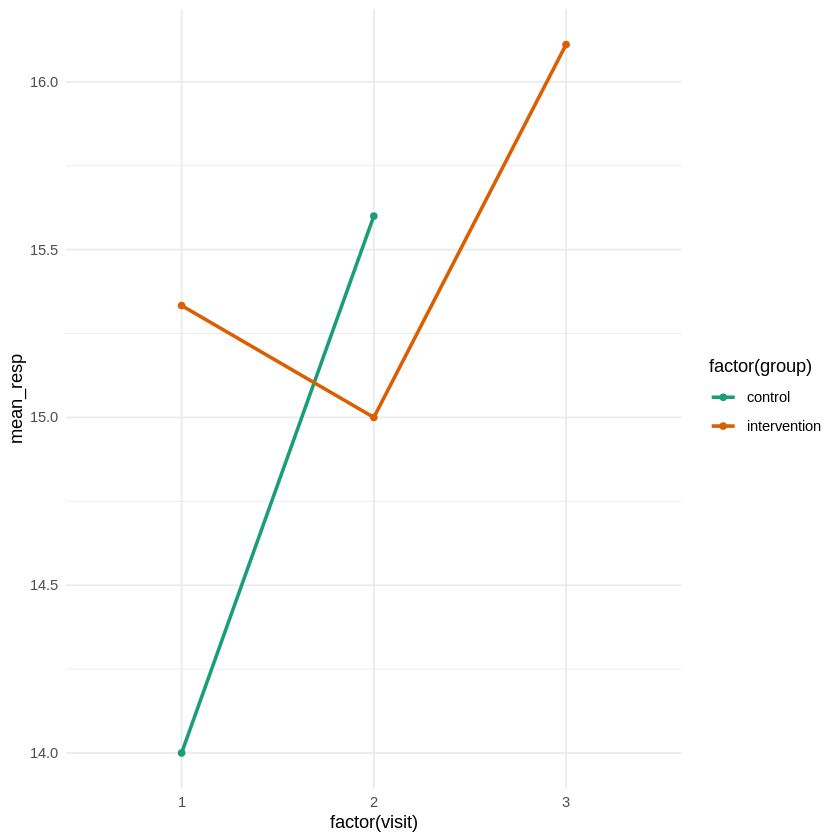

In [ ]:
data %>% 
  group_by(group, visit) %>% 
  summarize(mean_resp = mean(respiration_rate_v1_3)) %>% 
  ggplot(aes(x = factor(visit), y = mean_resp, group = factor(group), color = factor(group))) +
  geom_line(size = 1) +
    geom_point() + scale_color_brewer(palette = "Dark2") + theme_minimal()

In [ ]:
data %>% 
  group_by(pseudonym, visit) %>% 
  summarize(mean_resp = mean(respiration_rate_v1_3, na.rm = TRUE)) %>% 
  pivot_wider(names_from = visit, values_from = mean_resp)

`summarise()` has grouped output by 'pseudonym'. You can override using the `.groups` argument.



pseudonym,1,2,3
<dbl>,<dbl>,<dbl>,<dbl>
1,20,20,20
2,16,12,16
3,16,19,NA
4,13,13,14
5,13,15,16
6,18,16,16
7,12,14,18
8,13,16,18
9,16,16,11


`summarise()` has grouped output by 'pseudonym'. You can override using the `.groups` argument.



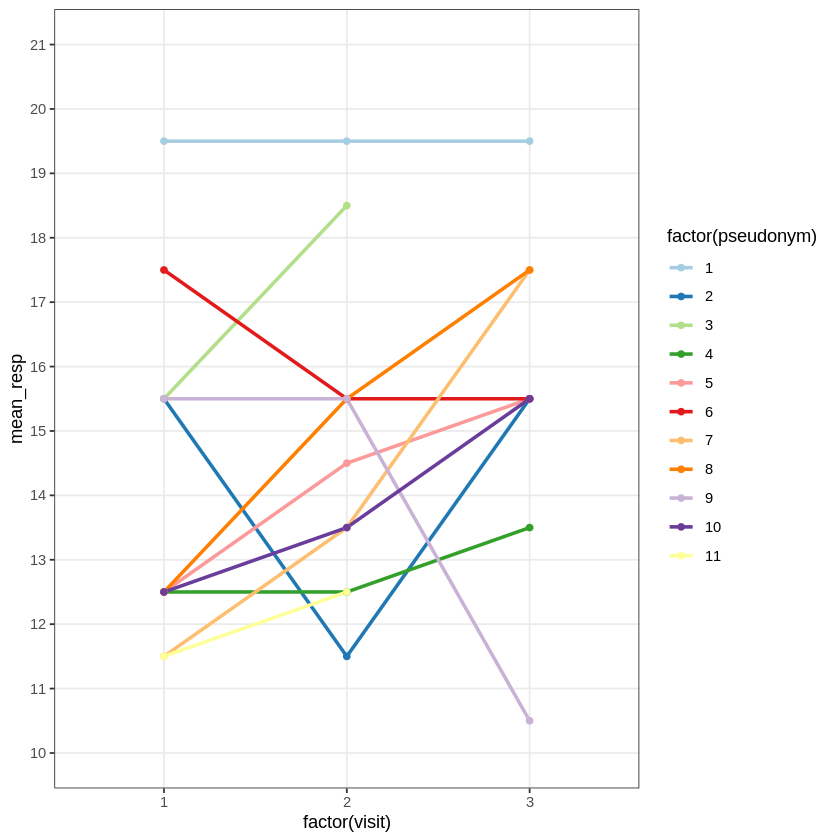

In [ ]:
data %>% 
  group_by(pseudonym, visit) %>% 
  summarize(mean_resp = mean(respiration_rate_v1_3)) %>% 
  ggplot(aes(x = factor(visit), y = mean_resp, group = factor(pseudonym), color = factor(pseudonym))) +
  geom_line(size = 1) +
    geom_point() +
  scale_y_binned(limits = c(10, 21)) +
 scale_color_brewer(palette = "Paired") +
  theme_bw()